# Import necessary dependencies and settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats
from sklearn import preprocessing

%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

# Raw Measures

## Values

In [2]:
poke_df = pd.read_csv('..\data\general_dfs\Pokemon.csv', encoding='utf-8')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [3]:
poke_df[['HP', 'Attack', 'Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


In [4]:
poke_df[['HP', 'Attack', 'Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


## Counts

Load the song_views.csv dataset and understand the features.

In [5]:
songs = pd.read_csv(r'..\data\general_dfs\song_views.csv')
songs.head(1)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2


In [6]:
print (f'{songs.info()}\n\n{songs.isnull().any()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
user_id         365 non-null object
song_id         365 non-null object
title           365 non-null object
listen_count    365 non-null int64
dtypes: int64(1), object(3)
memory usage: 11.5+ KB
None

user_id         False
song_id         False
title           False
listen_count    False
dtype: bool


# Binarization

Often raw frequencies or counts may not be relevant for building a model based on the problem which is being solved. For instance if I’m building a recommendation system for song recommendations, I would just want to know if a person is interested or has listened to a particular song. This doesn’t require the number of times a song has been listened to since I am more concerned about the various songs he\she has listened to. In this case, a binary feature is preferred as opposed to a count based feature. Add a column that includes this information, with a new column watched, that takes the value 1, when the listen count is >0


In [7]:
songs.insert(4, "listened", 0)

In [8]:
songs.head(1)

,user_id,song_id,title,listen_count,listened
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,0


In [9]:
for e in range(len(songs.index)):
    count = songs.listen_count[e]
    if  count > 0:
        songs.loc[e, 'listened'] =  1
       
       
print ('Done')

Done


In [10]:
songs.head()

,user_id,song_id,title,listen_count,listened
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0


In [11]:
songs.listened.value_counts()

0    333
1     32
Name: listened, dtype: int64

## Binarization with sklearn

Look at the documentation of sklearn preprecessing. Specifically to the Binarizer method. Try to use this method to obtainn a binarization of the song_views dataset.

In [12]:
binarizer = preprocessing.Binarizer(threshold=0, copy=True)

In [13]:
songs['listened_2'] = binarizer.fit_transform(songs.listen_count.values.reshape(-1, 1))
songs.head()

,user_id,song_id,title,listen_count,listened,listened_2
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0


# Rounding

Load the item_popularity.csv dataset and understand the features.

In [14]:
items = pd.read_csv(r'..\data\general_dfs\item_popularity.csv')
items.head(2)

,item_id,pop_percent
0,it_01345,0.98324
1,it_03431,0.56123


In [15]:
items.pop_percent.describe()

count    7.000000
mean     0.616909
std      0.312315
min      0.120980
25%      0.457995
50%      0.565020
75%      0.866565
max      0.983240
Name: pop_percent, dtype: float64

Include new columns in the dataset showing a popularity scale of 100 and 100, being those 2 columns integer numbers.

In [16]:
items['popularity_scale_10'] = np.array(np.round((items['pop_percent'] * 10)), dtype='int')
items['popularity_scale_100'] = np.array(np.round((items['pop_percent'] * 100)), dtype='int')
items # Solución de los ejercicios, no la mía

,item_id,pop_percent,popularity_scale_10,popularity_scale_100
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


In [17]:
items

,item_id,pop_percent,popularity_scale_10,popularity_scale_100
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


# Interactions

Load the pokemon dataset. Build a new data set including only 'Attack' and 'Defense'.

In [18]:
poke = pd.read_csv(r'..\data\general_dfs\Pokemon.csv')
poke.head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False


In [19]:
poke.shape

(800, 13)

Build a new dataframe using the PolynomialFeatures method in sklearn.preprocesing. Use a degree 2 polynomic function. Try to understand what is happening.

In [20]:
poly = preprocessing.PolynomialFeatures(degree=3, interaction_only=True)

In [21]:
data = poly.fit_transform(poke[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])

In [22]:
poke_2 = pd.DataFrame(data)
poke_2.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,14310.0,15582.0,...,156065.0,156065.0,108045.0,207025.0,143325.0,143325.0,207025.0,143325.0,143325.0,190125.0


In [23]:
poke_2.shape

(800, 64)

In [24]:
# Ni puñetera idea, bro

# Binning

Import the dataset in fcc_2016_coder_survey_subset.csv

In [25]:
fcc = pd.read_csv(r'..\data\general_dfs\fcc_2016_coder_survey_subset.csv')
fcc.head(1)

,ID.x,Age,ChildrenNumber,CountryCitizen,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,Income,JobPref,JobRoleInterest,LanguageAtHome,MaritalStatus,SchoolDegree,StudentDebtOwe
0,cef35615d61b202f1dc794ef2746df14,28.0,NaN,United States of America,office and administrative support,Employed for wages,NaN,male,32000.0,freelance,NaN,English,married or domestic partnership,"some college credit, no degree",20000.0


## Fixed-width binning

Create an histogram with the Age of the developers

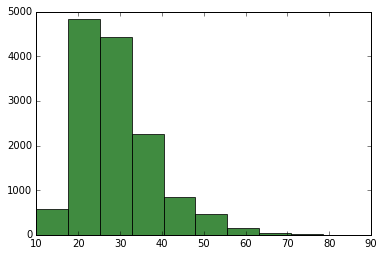

In [26]:
plt.hist(fcc.Age, color= 'darkgreen', alpha= 0.75);

### Developer age distribution

In [27]:
import seaborn as sns

In [28]:
# sns.scatterplot(x=fcc['ID.x'], y= fcc.Age, data = fcc, alpha= 0.75)

KeyboardInterrupt: 

### Binning based on rounding

Create a new column in the dataframe, that indicates the following bins: 

``` 
Age Range: Bin
---------------
 0 -  9  : 0
10 - 19  : 1
20 - 29  : 2
30 - 39  : 3
40 - 49  : 4
50 - 59  : 5
60 - 69  : 6
  ... and so on
```

### Binning based on custom ranges

Create two new columns in the dataframe. The first one should include the custom age range. The second one should include the bin_label. You should use the cut() function.

``` 
Age Range : Bin
---------------
 0 -  15  : 1
16 -  30  : 2
31 -  45  : 3
46 -  60  : 4
61 -  75  : 5
75 - 100  : 6
```

## Quantile based binning

Now we will work with the salaries of the dataset

### Plot an histogram with the developers income, with 30 bins.

### Calculate the [0, .25, .5, .75, 1.] qunatiles, and plot them as lines in the histogram

### In the original dataframe create 2 columns. One that indicates the income range values, and a second one with the following labels: ['0-25Q', '25-50Q', '50-75Q', '75-100Q']

# Mathematical Transformations

## Log transform

In the salaries survey dataset include a new column with the log transformation of the income called 'Income_log'.


Plot the instogram of the 'Income_log' column, with 30 bins. Include a line showing the mean of the new colunm in the histogram plot.

## Box–Cox transform

Build 2 new columns with the 'boxcox' method.

In the first place you have to remove the NaN in in come and calculate the optimal lambda with boxcox.

Then build the dataframe using lmbda=0 and the optimal value including the columns 'Income_boxcox_lambda_0' and 'Income_boxcox_lambda_opt'. 

Visualize the results. As you can see the lmbda=0 creates a log transformation. 


### Plot the histogram of the 'Income_boxcox_lambda_opt' column, with 30 bins. Include a line showing the mean of the new colunm in the histogram plot. Plot a line with the value of the mean of the new column.

In [2]:
prueba1 = pd.DataFrame({'id': [862, 1004, 804], 'genre': [['animation', 'scifi'], 'drama', ['animation', 'drama']]})
prueba2 = pd.DataFrame({'id':[862, 862, 862, 1004, 804, 804], 'gender': ['male', 'male', 'female', 'female', 'female', 'female']})
prueba3 = pd.DataFrame({'genre':['animation', 'drama', 'scifi']})

In [3]:
prueba1.head(1)

,id,genre
0,862,"[animation, scifi]"


In [8]:
binarizer = preprocessing.Binarizer(threshold='male', copy=True)
gender_bin = lambda x: 1 if x == 'male' else 0

In [9]:
prueba2['gender_bins'] = prueba2.gender.apply(gender_bin)
prueba2.head()

,id,gender,gender_bins
0,862,male,1
1,862,male,1
2,862,female,0
3,1004,female,0
4,804,female,0


In [12]:
dict(prueba2.gender.value_counts())['female']

4